# Predicting heart disease using machine learning

This notebook looks into using python-based machine learning and data science libraries in an attempt to build a machine learning model which is capable of predicting that whether the person had heart-disease or not based on their medical attribute.

We are going to take the following approch:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Defination

In a statement:
> Given clinical parameters about a patient, can we predict whether they have heart disease or not?

## 2. Data

The original data came from the cleaveland data from UCI repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

This is also a version availble in kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## 3. Evaluation

> If we can reach 95% of accuracy at predicting wether or not patient has hear-disease during the proof of concept, we will pursue the project.

## 4. Features

This is where you will get information about each feature

**Creating data dictionary**
* age age in years
* sex (1 = male; 0 = female)
* cp : chest pain type
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol serum cholestoral in mg/dl
* fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg resting electrocardiographic results
* thalach maximum heart rate achieved
* exang exercise induced angina (1 = yes; 0 = no)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by flourosopy
* thal 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

## Preparing the data

We are going to use Pandas Numpy and Matplotlib for data analysis and and manipulation

In [1]:
# Import all the tools we used

# Regular EDA (Exploratoru data analysis) and ploting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want plot inside the notebook so,
%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (EDA)

The goal here is to find out more of data and become a subject expert of dataset that you are working with

1. What question are you goin to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing in the data and do we deal with it?
4. Where are the outliers and how should you care about them?
5. How can you change, remove or add features to get more out of ypur data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Lets find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

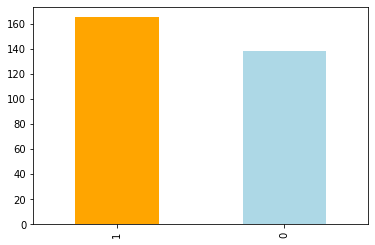

In [6]:
df["target"].value_counts().plot(kind='bar' , color=["orange" , "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


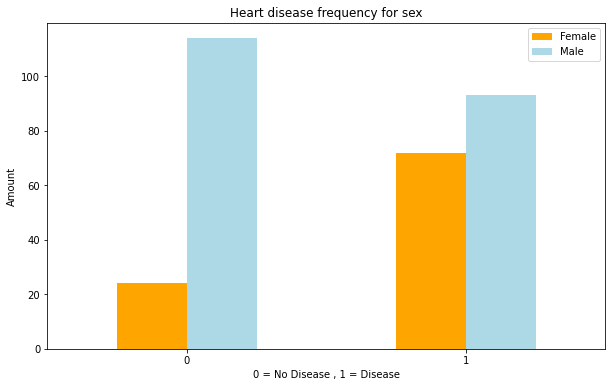

In [12]:
pd.crosstab(df.target , df.sex).plot(kind='bar', 
                                     figsize=(10 , 6),
                                     color = ["orange" , "lightblue"]);
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"])
plt.xticks(rotation=0);

## Age vs Max Heart rate for Heart Disease

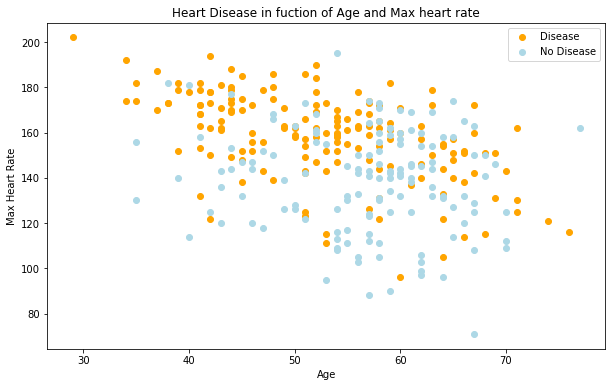

In [13]:
# Create another figure
plt.figure(figsize=(10 , 6))

# Scater with positive example
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color = "orange")

# Scatter with negative example
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color = "lightblue")

# Custumized the graph
plt.title("Heart Disease in fuction of Age and Max heart rate")
plt.legend(["Disease" , "No Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

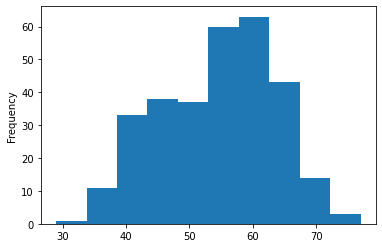

In [14]:
# Check the distribution of age column with histogram
df.age.plot.hist();

## Heart disease frequency with Chest pain

* cp : chest pain type
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic

In [15]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


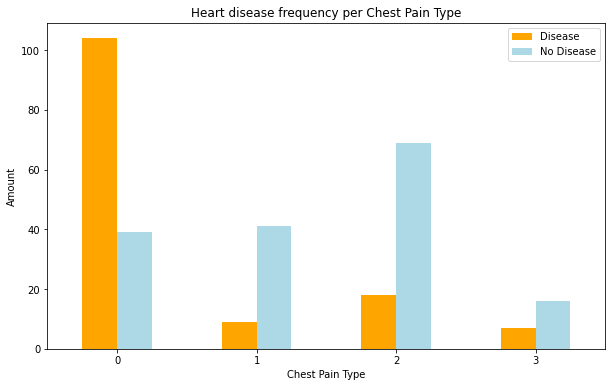

In [16]:
pd.crosstab(df.cp , df.target).plot(kind='bar', 
                                     figsize=(10 , 6),
                                     color = ["orange" , "lightblue"]);
plt.title("Heart disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["Disease" , "No Disease"])
plt.xticks(rotation=0);

In [17]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [18]:
# same as up there but x-axis is according to target
pd.crosstab(df.target , df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


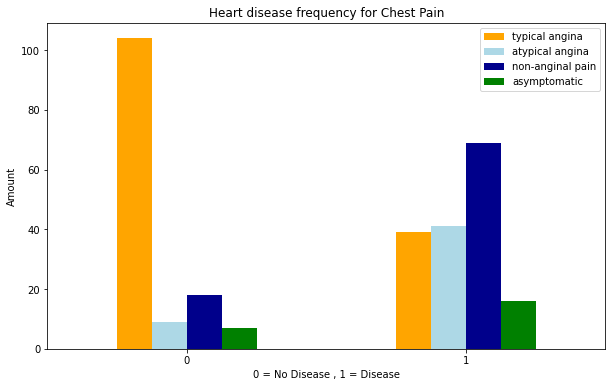

In [19]:
pd.crosstab(df.target , df.cp).plot(kind='bar', 
                                     figsize=(10 , 6),
                                     color = ["orange" , "lightblue" , "darkblue" , "green"]);
plt.title("Heart disease frequency for Chest Pain")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["typical angina" , "atypical angina" , "non-anginal pain" , "asymptomatic"])
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# MAke a correlation metrics
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


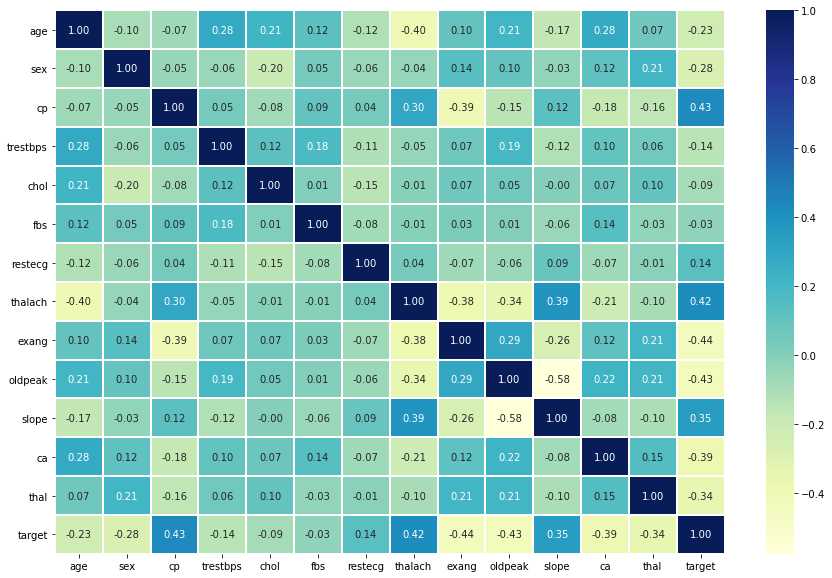

In [22]:
# Lets make it visual by usinf seaborn heatmap
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15 , 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=1,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modelling

In [23]:
# Split the data into x and y
x = df.drop("target" , axis=1)
y = df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# random seed
np.random.seed(42)

# Now split the data into train and test
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we have got our data into training and test split, its time to bulid machine learning model.

First we will train it (find the patterns) on training set.

Second we will test it (use the paterns) on the test set.

We are going to try three differnet model on our data:

1. Logistic Reggression.
2. K-Nearest Neighbours Classifier.
3. Random Forest Classifier.

In [29]:
# Put models in dictionary
models = {"Logistic Reggression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models , x_train , x_test , y_train , y_test):
    """
    Fits and Evaluate differne Machine Learning Models.
    models : a dict of different machine learning models.
    x_train : training data with no label
    x_test : testing data with no label
    y_train : training labels
    y_test : testing labels
    """
    # Setup random seed
    np.random.seed(42)
    # Make dictionary to keep model score
    model_scores = {}
    # Loop through the model
    for name , model in models.items():
        # Fit the model to the data
        model.fit(x_train , y_train)
        # Sore of models
        model_scores[name] = model.score(x_test , y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models,
                              x_train,
                              x_test,
                              y_train,
                              y_test)
model_scores

C:\Users\farja\Desktop\ml_course\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Reggression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [31]:
compare_models = pd.DataFrame(model_scores , index = ["Accuracy"])
compare_models

,Logistic Reggression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


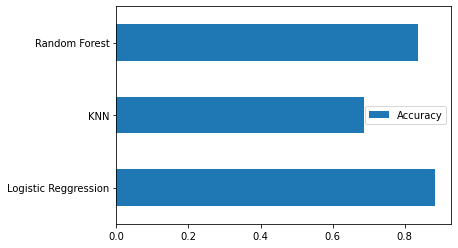

In [32]:
compare_models.T.plot.barh();

Now we have got baseline model...and we know that model first prediction wasn't what we should based our next step was:
So what we do now?

Lets look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion metrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning (By Hand)

In [33]:
# Lets tune KNN
train_score = []
test_score = []

# Create the list of different values of n-neighbor
neighbors = range(1 , 21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop the n=neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train , y_train)
    
    # Update the training score list
    train_score.append(knn.score(x_train , y_train))
    # Udate the testing score list
    test_score.append(knn.score(x_test , y_test))

In [34]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximun KNN score on test set is : 75.41%


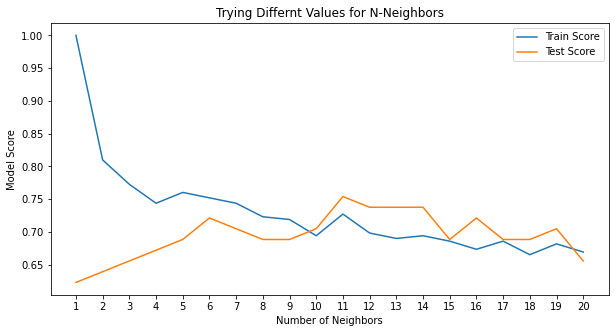

In [36]:
fig , ax = plt.subplots(figsize = (10 , 5))
plt.plot(neighbors , train_score , label = "Train Score")
plt.plot(neighbors , test_score , label = "Test Score")
plt.xticks(np.arange(1 , 21 , 1))
plt.title("Trying Differnt Values for N-Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximun KNN score on test set is : {max(test_score) * 100:.2f}%")

## Hyperparmeter Tuning with RandomizedSearchedCV

We are going to tune:

* Logistic Regresstion
* Random Forest Classifier

....using RandomizedSearchCV

In [47]:
# Create hyperparameter Grid for logistic Reggresstion
log_reg_grid = {"C" : np.logspace(-4 , 4 , 20),
                "solver" : ["liblinear"]}

# Create hyperparameter grid for Random Forest Classifier
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50),
           "max_depth" : [None , 3 , 5 , 10],
           "min_samples_split" : np.arange(2 , 20 ,2),
           "min_samples_leaf" : np.arange(1 , 20 ,2)}

Now we have got hyperparameter grids setup for each of our model, lets tune them with RandomizedSearchCV

In [38]:
# Tune Logistic Reggression
np.random.seed(42)

# Setup Random hyperparameter for Logistic Reggression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticReggressyion 
rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [49]:
rs_log_reg.score(x_test , y_test)

0.8852459016393442

Lets do same for RandomForestClassifier.......

In [50]:
# setup random seed
np.random.seed(42)

# Set random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv = 5,
                           n_iter= 20,
                           verbose= True)

# Fit random hyperparameter search model for RandomizedSearchCV
rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
# Finding the best Hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [52]:
# Evaluated the ramdomized search RandomForestModel
rs_rf.score(x_test , y_test)

0.8688524590163934

In [53]:
model_scores

{'Logistic Reggression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Since our Logistic regression provide best score so far,we will try to improve the them with GridSearechCV

In [54]:
# Different hyperparameter of GridSearchCV
log_reg_grid = {"C" : np.logspace(-4 , 4 , 30),
                "solver"  : ["liblinear"]}

# Setup grid hyperparameter search for LogisticReggression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose=True)

# Fit the grid hyperparameter search model
gs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Evaluate the grid search LogisticReggression model
gs_log_reg.score(x_test , y_test)

0.8852459016393442

## Evaluate Our tuned machine learning learning classifier, beyond the accuray

* ROC curve and AUC score
* Confusion metrix
* Classification report
* Precision
* Recall
* F1-score

.....and it would be great if cross-validation was used where possible

To make comparions and evalute our trained model, first we need to make predictions

In [57]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

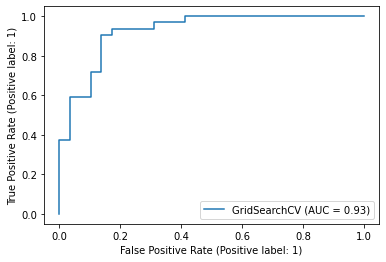

In [60]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg , x_test , y_test)

In [61]:
# Confusion metrics
confusion_matrix(y_test , y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

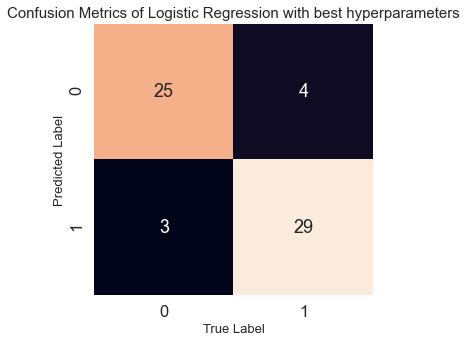

In [77]:
# Make confusion matric with seaborn heatmap
sns.set(font_scale = 1.5)


# Fuction for confusion metric
def plot_conf_mat(y_test , y_preds):
    """
    Plot a confusion metric using seaborn heatmap.....
    """
    fig , ax = plt.subplots(figsize = (5 , 5))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                     annot=True,
                     cbar=False)
    label_font = {'size':'13'}
    plt.xlabel("True Label" , fontdict=label_font)
    plt.ylabel("Predicted Label" , fontdict=label_font)
    
    title_font = {'size':'15'}
    plt.title("Confusion Metrics of Logistic Regression with best hyperparameters" , fontdict=title_font )
    

plot_conf_mat(y_test , y_preds)    

Now we have got a ROC curve, AUC score and cinfusion metrics, lets get a classification report as well as cross-validated precision, recall and f1-score.....

In [78]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metics using cross_validation

we are going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we will be using `cross_val_score`

In [79]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")

In [85]:
# Cross Validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [87]:
# Cross Validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [89]:
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [90]:
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

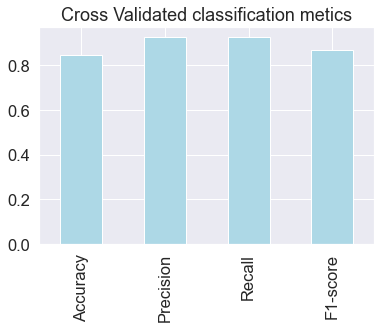

In [111]:
# Visualize Cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1-score" : cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title = "Cross Validated classification metics",
                      color = ['lightblue'],
                      legend = False);

## Feature Importance

Feature importance is : which attribute contributed most of the outcomes of model and how did they contribute?

Lets find out the feature importance of our Logistic Reggression model..

In [112]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [113]:
# Fit the instance of logisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

clf.fit(x_train , y_train);

In [114]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [115]:
# Match coef_ of features to columns
features_dict = dict(zip(df.columns , list(clf.coef_[0])))
features_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

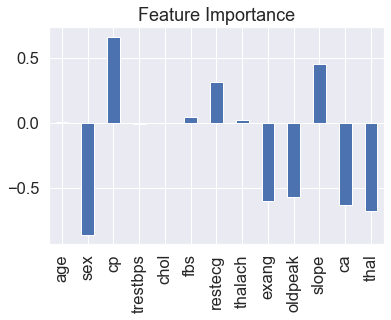

In [120]:
# Visualize feature dict
feature_df = pd.DataFrame(features_dict , index=[0])
feature_df.T.plot(kind='bar' , title = "Feature Importance" , legend = False);

In [121]:
pd.crosstab(df["sex"] , df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [122]:
pd.crosstab(df["slope"] , df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
